# Loading the libraries and data

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sn

In [3]:
#load data file
df1=pd.read_csv('QK.csv')

In [4]:
#checking if loaded correctly
df1.head()

,Unnamed: 0,custid,SUBSCRIBE,Disc,Title,LastOrder,Pcode,DA_Income,DA_Under20,DA_Over60,...,NumDeliv,NumMeals,MealsPerDeliv,Healthy,Veggie,Meaty,Special,TotPurch,Weeks3Meals,Sample
0,1,1309346,NaN,Senior,Mr,2018-01-26,B0V 2H9,57.5,137,105.0,...,23,46,2.0,9,26,10,1,481.913162,NaN,Holdout
1,2,2871764,NaN,NaN,NaN,2018-01-27,J6R 3P0,73.7,65,186.0,...,14,14,1.0,2,1,0,11,175.990934,NaN,Holdout
2,3,3150558,N,NaN,Mr,2018-01-15,L9N 0L2,53.3,313,176.0,...,10,10,1.0,6,1,0,3,117.933825,NaN,Validation
3,4,3013411,NaN,Senior,Mrs,2018-02-14,B1K 1E1,101.9,236,98.0,...,47,47,1.0,2,10,31,4,599.894814,1.0,Holdout
4,5,2600646,N,NaN,NaN,2017-12-18,L3V 1R5,76.6,196,80.0,...,10,20,2.0,12,1,7,0,235.538738,NaN,Validation


In [17]:

#To get an idea about the columns,  total number of non-null datapoints in each column and their datatype
df1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
Unnamed: 0       2000 non-null int64
custid           2000 non-null int64
SUBSCRIBE        1400 non-null object
Disc             514 non-null object
Title            1297 non-null object
LastOrder        2000 non-null object
Pcode            2000 non-null object
DA_Income        1935 non-null float64
DA_Under20       2000 non-null int64
DA_Over60        1935 non-null float64
DA_Single        1935 non-null float64
NumDeliv         2000 non-null int64
NumMeals         2000 non-null int64
MealsPerDeliv    2000 non-null float64
Healthy          2000 non-null int64
Veggie           2000 non-null int64
Meaty            2000 non-null int64
Special          2000 non-null int64
TotPurch         2000 non-null float64
Weeks3Meals      331 non-null float64
Sample           2000 non-null object
dtypes: float64(6), int64(9), object(6)
memory usage: 328.2+ KB


# Checking for Missing values visually

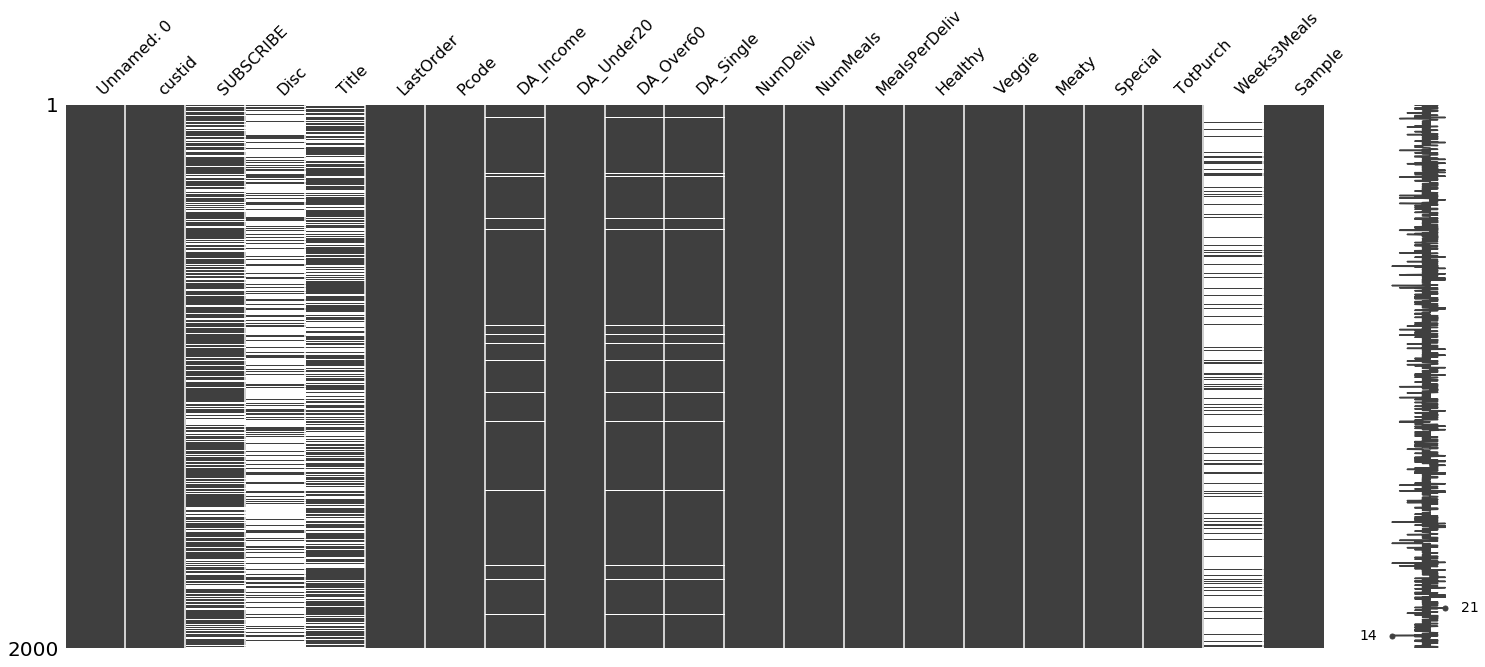

In [15]:
import missingno as msno

#data-dense display which lets you quickly visually pick out patterns in data completion
msno.matrix(df1)

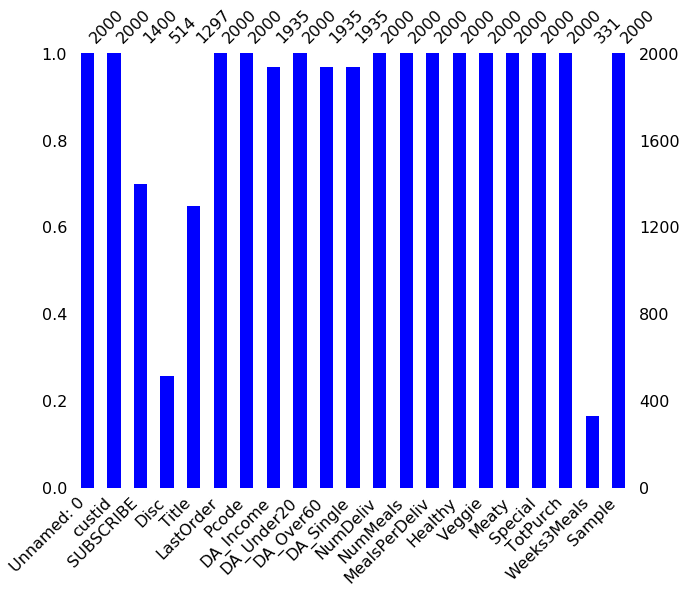

In [20]:
#visualizing data completeness in bar chart form
#also left y-axis  helps to get approxiate proportion of missing data
msno.bar(df1, color = 'b', figsize = (10,8))

Looks like Subscribe, Disc, TitleWeeks3Meals are columns with less that 80% complete data

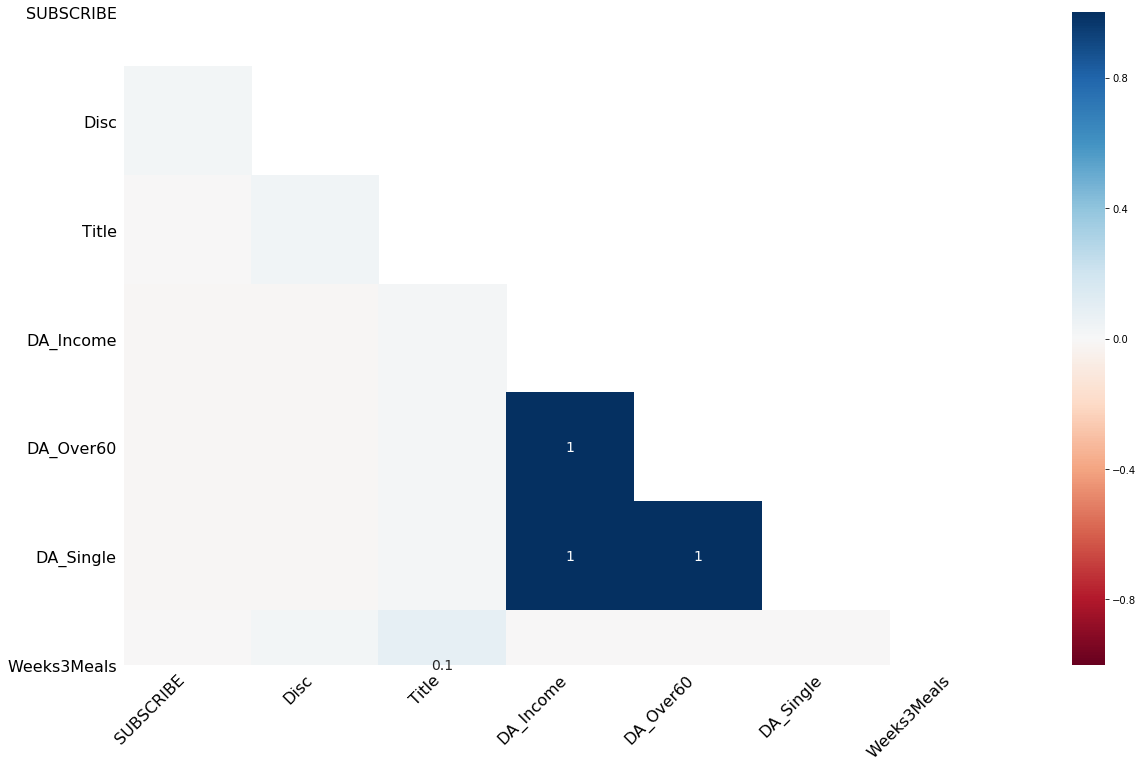

In [27]:
#The missingno correlation heatmap measures nullity correlation: 
#how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(df1)

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

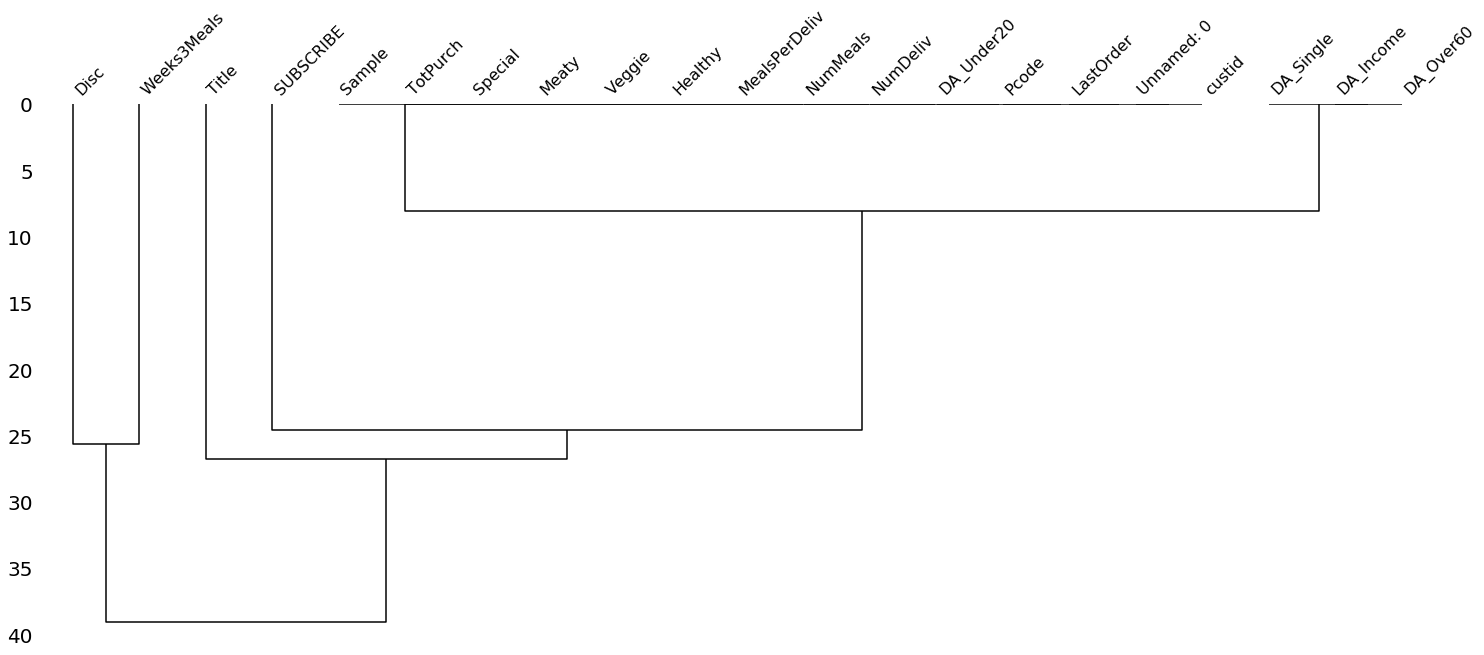

In [28]:
msno.dendrogram(df1)

 Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on
 Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity, then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" —that is, how many values you would have to fill in or drop, if you are so inclined.
https://github.com/ResidentMario/missingno


# Checking for Missing values numerically

In [39]:
#count of missing data per column
count_NAs_per_col=df1.isnull().sum().sort_values(ascending=False)
percent_NAs_per_col= ((df1.isnull().sum()/df1.shape[0])*100).sort_values(ascending=False)
missing_data = pd.concat([count_NAs_per_col, percent_NAs_per_col], axis=1, keys=['Total Number of NAs', 'Percent of NAs'])
missing_data

,Total Number of NAs,Percent of NAs
Weeks3Meals,1669,83.45
Disc,1486,74.30
Title,703,35.15
SUBSCRIBE,600,30.00
DA_Single,65,3.25
DA_Over60,65,3.25
DA_Income,65,3.25
custid,0,0.00
LastOrder,0,0.00
Pcode,0,0.00


# Handling Missing values

### Fixing column Disc:

In [46]:
#number of missing values
df1['Disc'].isnull().sum()


1486

In [47]:
#what are the unique values?
df1['Disc'].unique()

array(['Senior', nan, 'Student'], dtype=object)

So it looks like here the NA is not missing info but it means the customer didnot qualify as a Student or a Senior. Therefore it is meaningful information and So we will create a new category called 'Neither' to replace NAs

In [43]:
#Making a deep copy of original dataframe
df2=df1.copy()


In [51]:
df2['Disc'].fillna('Neither', inplace = True)

#checking if NAs are replaced
print(df2['Disc'].unique())

#checking for missing values in Disc:
print(df2['Disc'].isnull().sum())

['Senior' 'Neither' 'Student']
0


### Fixing column  'Subscribe':

In [108]:
df2[['Weeks3Meals', 'SUBSCRIBE']].head(20)

,Weeks3Meals,SUBSCRIBE
0,NaN,NaN
1,NaN,NaN
2,NaN,N
3,1.0,NaN
4,NaN,N
5,NaN,N
6,NaN,N
7,NaN,N
8,NaN,NaN
9,NaN,NaN


Subscribe tell us whether the customer subscribed to this promotion offer or not. Here some of the values are NA because those rows are part of the holdout sample. But since we no longer have the actual values, using 'Weeks3Meals', we can impute these. This is because 'Weeks3Meals' tells us the number of weeks that a customer that subscribed for the promotional offer stayed with the three-meal-plan, after the promotion was over. So for sure customers who have non null values in 'Weeks3Meals' must have subscribed to the offer since that is the precondition to measuring 'Weeks3Meals'. Also where 'Weeks3Meals' says that it is not applicable to the customer, it means the customer did not subscribe to the offer. 

Therefore, we can replace NA in Subcribe with Y for those rows in which 'Weeks3Meals' is not NA:

In [105]:
df2['SUBSCRIBE'].unique()

array([nan, 'N', 'Y'], dtype=object)

In [141]:
#looking at dataframe before making changes
df2['SUBSCRIBE'].value_counts()

N    1169
Y     231
Name: SUBSCRIBE, dtype: int64

In [73]:
df3=df2.copy()
#df3.head()

In [130]:
#finding rows with NA in Subcribe for those rows in which 'Weeks3Meals' is not NA:
df3[['SUBSCRIBE','Weeks3Meals']][df3['Weeks3Meals'].notnull()].head()
    

,SUBSCRIBE,Weeks3Meals
3,NaN,1.0
10,Y,5.0
21,Y,0.0
47,Y,2.0
68,Y,4.0


In [134]:
#replacing NA in Subcribe with Y for those rows in which 'Weeks3Meals' is not NA
df3.loc[(df3['Weeks3Meals'].notnull()) & (df3['SUBSCRIBE'].isnull()), 'SUBSCRIBE'] ='Y'

In [135]:
#checking if rows with NA in Subcribe for those rows in which 'Weeks3Meals' is not NA have all been replaced:
df3[['SUBSCRIBE','Weeks3Meals']][df3['Weeks3Meals'].notnull()].head()

,SUBSCRIBE,Weeks3Meals
3,Y,1.0
10,Y,5.0
21,Y,0.0
47,Y,2.0
68,Y,4.0


In [140]:
#looking at values again
df3['SUBSCRIBE'].value_counts()

N    1169
Y     331
Name: SUBSCRIBE, dtype: int64

So as expected the total count for  'Y' has gone up.

In [143]:
df4=df3.copy()



In [144]:
#finding rows with NA in Subcribe for those rows in which 'Weeks3Meals' is not NA:
df4[['SUBSCRIBE','Weeks3Meals']][df4['Weeks3Meals'].isnull()].head()

,SUBSCRIBE,Weeks3Meals
0,NaN,NaN
1,NaN,NaN
2,N,NaN
4,N,NaN
5,N,NaN


In [146]:
#replacing NA in Subcribe with N for those rows in which 'Weeks3Meals' is not NA

df4.loc[(df4['Weeks3Meals'].isnull()) & (df4['SUBSCRIBE'].isnull()), 'SUBSCRIBE']='N'

In [147]:
df4[['SUBSCRIBE','Weeks3Meals']][df4['Weeks3Meals'].isnull()].head()

,SUBSCRIBE,Weeks3Meals
0,N,NaN
1,N,NaN
2,N,NaN
4,N,NaN
5,N,NaN


In [149]:
#looking at values again
df4['SUBSCRIBE'].value_counts()

N    1669
Y     331
Name: SUBSCRIBE, dtype: int64

So as expected the total count for  'N' has gone up.

In [151]:
#checking if there are still any missing values in 'SUBSCRIBE':
print(df4['SUBSCRIBE'].isnull().sum())

0
